In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils

from keras.models import load_model

In [4]:
# 버전 확인
tf.__version__

'2.4.1'

In [5]:
tf.keras.__version__

'2.4.0'

In [6]:
iris = sns.load_dataset('iris')

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1. Data Preprocessing

### 1) iris.Species 빈도 분석
- Species: setosa, virginica, versicolor

In [9]:
iris.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

### 2) DataFrame to Array & Casting
- 우리가 원하는 Tensor의 형태가 아니다

In [10]:
iris_AR = iris.values
# values를 하면 array로 빠진다

iris_AR
# 숫자만 들어있어야 하는데 문자가 들어있다

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

- object to float

In [11]:
AR_X = iris_AR[: , 0:4].astype(float)
AR_y = iris_AR[: , 4] 

AR_X.shape, AR_y.shape

((150, 4), (150,))

In [12]:
AR_y
# 여전히 문자가 들어있다

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

### 3) One Hot Encoding with sklearn & Keras

- LabelEncoder()
  - ['setosa' , 'virginica', 'virsicolor'] to [0, 1, 2]

In [13]:
encoder = LabelEncoder()

AR_yLBE = encoder.fit_transform(AR_y)

AR_yLBE

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- One-Hot Encoding - to_categorical()

In [14]:
# keras OHE는 문자를 안받으므로 LabelEncoder로 숫자로 변환
# sklearn OHE도 array로 바꿔주는 두 단계를 거쳐야 함
# to_categorical 함수 사용

AR_yOHE = tf.keras.utils.to_categorical(AR_yLBE)

AR_yOHE

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

### 4) Train & Test Split with sklearn Package

In [15]:
# 전처리 후 Train Test Split

X_train, X_test, y_train, y_test = train_test_split(AR_X, AR_yOHE,
                                                    test_size = 0.3,
                                                    random_state = 2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# input size는 이미 정해짐

((105, 4), (45, 4), (105, 3), (45, 3))

## 2. Keras Modeling

### 1) Model Define

- 모델 신경망 구조 정의

In [16]:
# Sequential로 모델을 만듦
Model_iris = models.Sequential()

# Dense: Fully-connected 의미
# units: node 개수
# 층은 얼마든지 쌓든지 줄이든지 할 수 있다

# 첫번째 Layer에서 input size 지정(이미 정해져있음)
Model_iris.add(layers.Dense(units = 16, activation = 'relu' , input_shape = (4,)))
Model_iris.add(layers.Dense(8, activation = 'relu'))

# 모델 숫자가 정해져있음(Output size가 정해져 있으므로)
Model_iris.add(layers.Dense(3, activation = 'softmax'))

- 모델 구조 확인
  - Layers & Parameters

In [17]:
Model_iris.summary()
# b는 레이어가 아니라 노드마다 있는 것

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


- 모델 레이어 시각화

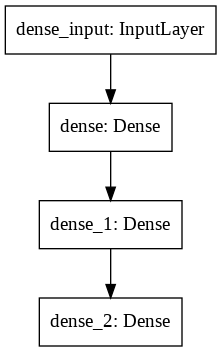

In [18]:
utils.plot_model(Model_iris)
# 그림으로 그려줌
# 일반적으로 summary를 사용한다

### 3) Model Compile
- 모델 학습방법 설정

In [19]:
# 어떤 모델을 만들지에 따라 compile방식은 거의 정해져있다

# compile: 학습 방법 결정
# categorical_crossentropy: 다중분류
# binary: 이진분류
# mse: 예측

Model_iris.compile(loss = 'categorical_crossentropy',
                   optimizer = 'adam', # sgd, momentum, RMSProp
                   metrics = ['accuracy']) # 이진분류일 경우 precision, recall
                                           # 예측: mse, mae

### 4) Model Fit
- 모델 학습 수행

In [20]:
History_iris = Model_iris.fit(X_train, y_train,
                             epochs = 500,
                             batch_size = 7, # 한번에 7개씩 처리 (sgd 방식)
                                             # 105개 train data를 7개씩 끊어서 학습 (15번)
                                             # 7개를 15번 보면, 1 epoch
                             validation_data = (X_test, y_test))

# 한번 Epoch가 15개로 끊어져있음
# 실제 경사하강은 15 * 500 번 이루어진다

Epoch 1/500
15/15 [==============================] - 1s 30ms/step - loss: 1.4792 - accuracy: 0.3803 - val_loss: 1.4586 - val_accuracy: 0.3111
Epoch 2/500
15/15 [==============================] - 0s 4ms/step - loss: 1.4896 - accuracy: 0.3043 - val_loss: 1.3301 - val_accuracy: 0.3111
Epoch 3/500
15/15 [==============================] - 0s 3ms/step - loss: 1.4179 - accuracy: 0.3491 - val_loss: 1.2198 - val_accuracy: 0.3111
Epoch 4/500
15/15 [==============================] - 0s 4ms/step - loss: 1.1319 - accuracy: 0.4049 - val_loss: 1.1528 - val_accuracy: 0.3111
Epoch 5/500
15/15 [==============================] - 0s 4ms/step - loss: 1.2047 - accuracy: 0.2703 - val_loss: 1.1096 - val_accuracy: 0.3111
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 1.0545 - accuracy: 0.3864 - val_loss: 1.0852 - val_accuracy: 0.3111
Epoch 7/500
15/15 [==============================] - 0s 4ms/step - loss: 1.0299 - accuracy: 0.3897 - val_loss: 1.0651 - val_accuracy: 0.3111
Epoch 8/500


In [21]:
History_iris.history.keys()

# loss, accuracy: train data
# val_loss, val_accuracy: test data

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 5) 학습결과 시각화

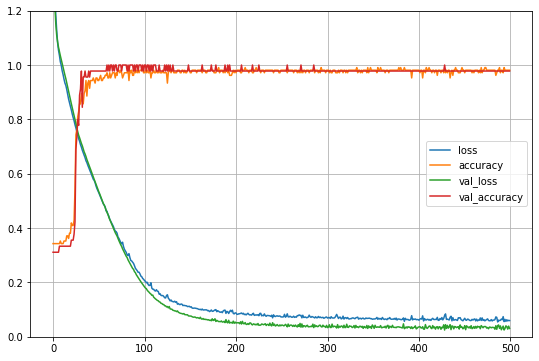

In [22]:
plt.figure(figsize = (9, 6))
plt.ylim(0, 1.2)
plt.plot(History_iris.history['loss'])
plt.plot(History_iris.history['accuracy'])
plt.plot(History_iris.history['val_loss'])
plt.plot(History_iris.history['val_accuracy'])

plt.legend(History_iris.history.keys())
plt.grid()
plt.show()

# accuracy는 1에 가까워지고 있고, loss는 0에 가까워지고 있음
# 300번 정도만 해도 성능이 비슷하게 나옴을 볼 수 있다

### 6) Model Evaluate
- Loss & Accuracy
- 여기서 마음에 안들면 앞 단계로 다시 돌아가야 한다
(Hyperparameter tuning)
  - 하나씩 바꿔가며 튜닝

In [23]:
loss, accuracy = Model_iris.evaluate(X_test, y_test)

print('Loss = {:.2f}' .format(loss))
print('Accuracy = {:.2f}' .format(accuracy))

# 0.98이 나옴 (좋은 것인가 나쁜것인가는 판단해야 함)

2/2 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9778
Loss = 0.03
Accuracy = 0.98


### 7) Model Predict
- Probability
- 함수: predict(예측), predict_classes(분류)

In [24]:
np.set_printoptions(suppress = True, precision = 5)
Model_iris.predict(X_test) # 확률값(probability)으로 나옴

# softmax - 합이 1이 됨

array([[0.99829, 0.00047, 0.00124],
       [0.99262, 0.00387, 0.00351],
       [0.01222, 0.98306, 0.00472],
       [0.     , 0.00003, 0.99997],
       [0.99948, 0.00007, 0.00046],
       [0.00036, 0.99893, 0.0007 ],
       [0.     , 0.00591, 0.99408],
       [0.99961, 0.00004, 0.00035],
       [0.00001, 0.00046, 0.99953],
       [0.99775, 0.00073, 0.00152],
       [0.00047, 0.88453, 0.115  ],
       [0.     , 0.00229, 0.99771],
       [0.00001, 0.99676, 0.00322],
       [0.99986, 0.00001, 0.00014],
       [0.99947, 0.00008, 0.00046],
       [0.0001 , 0.99595, 0.00395],
       [0.00006, 0.98202, 0.01792],
       [0.99869, 0.00028, 0.00104],
       [0.00002, 0.9994 , 0.00058],
       [0.99957, 0.00005, 0.00038],
       [0.99813, 0.00053, 0.00134],
       [0.99821, 0.00049, 0.0013 ],
       [0.     , 0.00076, 0.99924],
       [0.99886, 0.00024, 0.0009 ],
       [0.     , 0.03725, 0.96275],
       [0.00005, 0.01327, 0.98668],
       [0.9993 , 0.00011, 0.00059],
       [0.00003, 0.99601, 0.

- Class

In [25]:
y_hat = Model_iris.predict_classes(X_test)
y_hat

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

- Probability to Class

In [26]:
Model_iris.predict(X_test)

array([[0.99829, 0.00047, 0.00124],
       [0.99262, 0.00387, 0.00351],
       [0.01222, 0.98306, 0.00472],
       [0.     , 0.00003, 0.99997],
       [0.99948, 0.00007, 0.00046],
       [0.00036, 0.99893, 0.0007 ],
       [0.     , 0.00591, 0.99408],
       [0.99961, 0.00004, 0.00035],
       [0.00001, 0.00046, 0.99953],
       [0.99775, 0.00073, 0.00152],
       [0.00047, 0.88453, 0.115  ],
       [0.     , 0.00229, 0.99771],
       [0.00001, 0.99676, 0.00322],
       [0.99986, 0.00001, 0.00014],
       [0.99947, 0.00008, 0.00046],
       [0.0001 , 0.99595, 0.00395],
       [0.00006, 0.98202, 0.01792],
       [0.99869, 0.00028, 0.00104],
       [0.00002, 0.9994 , 0.00058],
       [0.99957, 0.00005, 0.00038],
       [0.99813, 0.00053, 0.00134],
       [0.99821, 0.00049, 0.0013 ],
       [0.     , 0.00076, 0.99924],
       [0.99886, 0.00024, 0.0009 ],
       [0.     , 0.03725, 0.96275],
       [0.00005, 0.01327, 0.98668],
       [0.9993 , 0.00011, 0.00059],
       [0.00003, 0.99601, 0.

In [27]:
np.argmax(Model_iris.predict(X_test) , axis = 1)
# argmax: 제일 큰 값의 index를 뽑아줌 (원핫인코딩 중 probability가 제일 높은 값의 인덱스를 구해줌
# 많이 쓰인다

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

- One-Hot Encoding to Array
  - OHE 상태로는 Confusion Matrix를 그릴 수 없다
  - np.argmax(): 다차원 배열의 차원에 따라 가장 큰 값의 인덱스를 반환
  - axis = 1 : 열 기준

In [28]:
y = np.argmax(y_test, axis = 1)

y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

- Confusion Matrix & Classification Report

In [29]:
confusion_matrix(y, y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 13]])

In [30]:
print(classification_report(y, y_hat,
                            target_names = ['setosa' ,
                                            'virginica' ,
                                            'versicolor']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
   virginica       0.93      1.00      0.97        14
  versicolor       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## 3. Model Save & Load

### 1) File System
- Save to Colab File System

In [31]:
!ls -l

total 12
-rw-r--r-- 1 root root 7979 Mar 18 02:36 model.png
drwxr-xr-x 1 root root 4096 Mar  5 14:37 sample_data


In [32]:
Model_iris.save('Model_iris.h5')
# colab에 저장된

!ls -l

total 48
-rw-r--r-- 1 root root 34592 Mar 18 02:36 Model_iris.h5
-rw-r--r-- 1 root root  7979 Mar 18 02:36 model.png
drwxr-xr-x 1 root root  4096 Mar  5 14:37 sample_data


- Download Colab File System to Local File System

In [33]:
from google.colab import files

files.download('Model_iris.h5')
# local에 다운로드 됨 (마우스 클릭으로 다운로드 받아도 됨)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Load from Colab File System

In [34]:
Model_local = load_model('Model_iris.h5')
# 243개의 파라미터 값을 획득

In [35]:
Model_local.predict_classes(X_test)
# 분류작업을 해낸다

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

### 2) Google Drive
- Mount Google Drive

In [36]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


- Check Mounted_Drive

In [37]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets'

total 1741130
-rw------- 1 root root      20066 Mar  4 04:45 cat.1700.jpg
-rw------- 1 root root   68787205 Mar  9 04:06 creditCardFraud.zip
-rw------- 1 root root   90618980 Mar  4 04:51 dogs_and_cats_small.zip
drwx------ 2 root root       4096 Mar  9 04:27 image
-rw------- 1 root root    8204887 Mar  4 04:45 Images_500.zip
-rw------- 1 root root    4240457 Mar 15 04:25 Kaggle_Customer_Satisfaction.zip
-rw------- 1 root root   12929865 Mar  4 04:42 Logo_Data.zip
-rw------- 1 root root   18272469 Mar  4 04:50 MNIST.csv
-rw------- 1 root root   23715344 Mar  7 07:08 Online_Retail.xlsx
-rw------- 1 root root        741 Mar  4 04:44 PII.csv
-rw------- 1 root root 1141460846 Mar  4 04:50 waferImages.zip
-rw------- 1 root root  414658234 Mar  4 04:49 yolo_weight.zip


- Save to Mounted Google Drive Directory

In [38]:
# 로컬에 저장해두면 손상될 수 있으니 google drive에 저장해두는 것
Model_iris.save('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [39]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 34
-rw------- 1 root root 34592 Mar 18 02:42 001_Model_iris.h5


- Load from Mounted Google Drive Directory

In [40]:
# 구글 드라이브에서 모델을 load
Model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [41]:
Model_google.predict_classes(X_test)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

- input과 output의 숫자만 맞춰주면, 남이 만든 모델도 가져와서 사용할 수 있다(transferred learning)